In [422]:
################################################################################
# Author 1:      Lukas Umfahrer
# MatNr 1:       12337160
# Author 2:      Firstname Lastname
# MatNr 2:       01234567
# Author 3:      Firstname Lastname
# MatNr 3:       01234567
# File:          assignment2.ipynb
# Description: ... short description of the file ...
# Comments:    ... comments for the tutors ...
#              ... can be multiline ...
################################################################################


<center>
    <h1>Assignment 2</h1>
</center>

#### Imports

In [423]:
import pandas as pa
import matplotlib.pyplot as plt
import plotly as pl
import numpy as np
import pycountry as py
import pycountry_convert as pyco

## Part 1: Data Analysis & Visualization Code - Required Plots

### Line plots: Visualize data over time (4P)

In [424]:
data = pa.read_csv("OECD.ELS.HD,DSD_HEALTH_LVNG@DF_HEALTH_LVNG,+all.csv", delimiter = ",")   # Daten einlesen

data

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Unnamed: 5,FREQ,Unnamed: 7,MEASURE,Unnamed: 9,...,TIME_PERIOD,Unnamed: 19,OBS_VALUE,Unnamed: 21,OBS_STATUS,Unnamed: 23,UNIT_MULT,Unnamed: 25,DECIMALS,Unnamed: 27
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1961,NaN,110.2,NaN,A,NaN,0,NaN,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1962,NaN,109.1,NaN,A,NaN,0,NaN,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1963,NaN,110.7,NaN,A,NaN,0,NaN,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1964,NaN,114.2,NaN,A,NaN,0,NaN,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1965,NaN,113.0,NaN,A,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33528,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OVRGHT,NaN,...,2014,NaN,46.7,NaN,A,NaN,0,NaN,NaN,NaN
33529,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OVRGHT,NaN,...,2019,NaN,48.8,NaN,A,NaN,0,NaN,NaN,NaN
33530,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OBS,NaN,...,2008,NaN,11.5,NaN,A,NaN,0,NaN,NaN,NaN
33531,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OBS,NaN,...,2014,NaN,14.8,NaN,A,NaN,0,NaN,NaN,NaN


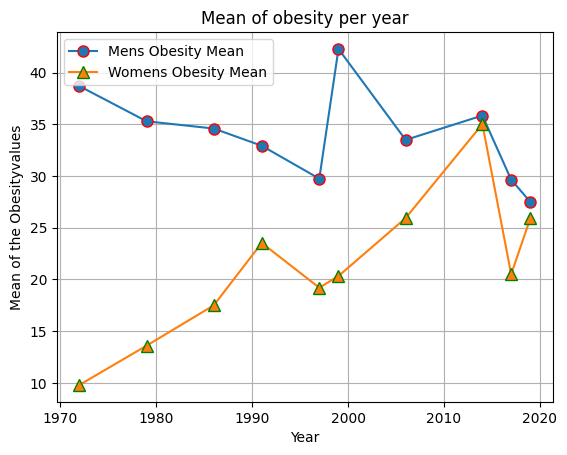

In [425]:
figure, axis = plt.subplots()

data_aut = data[data["REF_AREA"]=="AUT"]    # Nur Daten aus dem Land AUT verwenden

data_aut_men = data_aut[data_aut["SEX"]=="M"]   # Alle Daten von Männern in AUT
data_aut_women = data_aut[data_aut["SEX"]=="F"] # Alle Daten von Frauen in AUT

data_aut_men_mean = data_aut_men.groupby("TIME_PERIOD")["OBS_VALUE"].mean()     # Durchschnitt der Männer aus einem Jahr berechnen
data_aut_women_mean = data_aut_women.groupby("TIME_PERIOD")["OBS_VALUE"].mean() # Durchschnitt der Frauen aus einem Jahr berechnen

ys_men = data_aut_men_mean.values   # Werte
xs_men = data_aut_men_mean.index    # Jahre

# Graph der Männer
axis.plot(xs_men, ys_men,
          marker="o",
          markersize="8",
          markeredgecolor="red",
          label="Mens Obesity Mean")

ys_women = data_aut_women_mean.values   # Werte
xs_women = data_aut_women_mean.index    #Jahre

# Graph der Frauen
axis.plot(xs_women, ys_women,
          marker="^",
          markersize="8",
          markeredgecolor="green",
          label="Womens Obesity Mean")

axis.set_xlabel("Year")
axis.set_ylabel("Mean of the Obesityvalues")
axis.legend()
plt.title("Mean of obesity per year")
plt.grid(True)
plt.show()


### Bar charts: Compare data from different countries (4P)

### Scatter plots: Visualize the relationship between different variables (7P)